In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [247]:
data = pd.read_csv('C:/Users/ASUS-PC/Desktop/.../Storage/es-1min_FULL.csv')
data

,date,time,open,high,low,close
0,12/19/2011,9:30:00,1215.875,1216.375,1215.625,1215.875
1,12/19/2011,9:31:00,1215.875,1217.125,1215.875,1217.125
2,12/19/2011,9:32:00,1217.125,1217.875,1217.125,1217.625
3,12/19/2011,9:33:00,1217.625,1218.375,1217.625,1218.125
4,12/19/2011,9:34:00,1218.125,1218.375,1217.625,1217.875
...,...,...,...,...,...,...
390547,12/16/2015,16:10:00,2070.125,2070.375,2069.875,2070.125
390548,12/16/2015,16:11:00,2070.125,2070.875,2069.125,2069.250
390549,12/16/2015,16:12:00,2069.250,2072.125,2069.125,2072.125
390550,12/16/2015,16:13:00,2072.125,2072.625,2071.625,2072.000


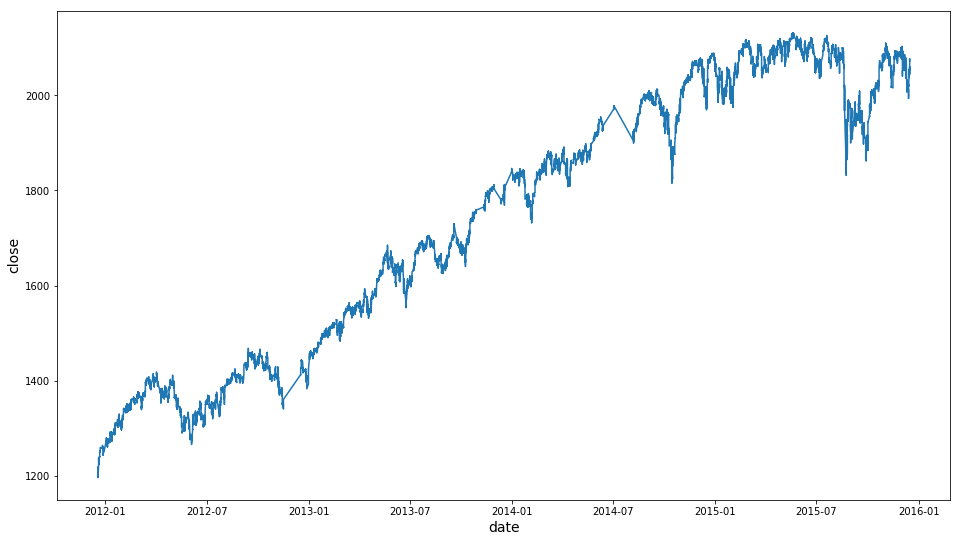

In [248]:
import datetime as dt

y = data['close'].values
x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in data['date'].values]

fig, ax = plt.subplots(figsize = (16, 9))
plt.plot(x,y)
plt.ylabel('close', fontsize = 14)
plt.xlabel('date', fontsize = 14)
plt.show()

In [249]:
import scipy.stats

def ratio(series : np.array, lookback : int, hold : int, k) -> float:
    R_lb = []
    R_hd = []

    i = 0
    while lookback + (i + 1) * hold < len(series):
        return_lb = (series[lookback + i * hold - 1] -  series[i * hold]) / series[i * hold]
        return_hd = (series[lookback + (i + 1) * hold - 1] -  series[lookback + i * hold]) / series[lookback + i * hold]
        R_lb.append(return_lb)
        R_hd.append(return_hd)
        i += 1
    corr, p_value = scipy.stats.pearsonr(np.array(R_lb), np.array(R_hd))
    
    return np.abs((corr / p_value) * k)

In [250]:
lookbacks = np.arange(5, 65, 5)
holds = np.arange(5, 65, 5)

In [251]:
table = np.zeros((len(lookbacks), len(holds)))

for i in range(len(lookbacks)):
    for j in range(len(holds)):
        table[i, j] = ratio(data['close'].values, lookbacks[i], holds[j], 10e-15)

In [252]:
df = pd.DataFrame(table,
                  index=pd.Index(lookbacks, name='lookbacks:'),
                  columns=pd.Index(holds, name='holds:')
)
df.style.background_gradient()

holds:,5,10,15,20,25,30,35,40,45,50,55,60
lookbacks:,,,,,,,,,,,,
5,0.000000,0.000000,0.000000,0.000000,348598777368712445952.000000,0.000000,2205.626627,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.011304,0.000000,0.000000,0.110123,0.000000,0.000000,0.029295,0.000000,0.000000,0.000000,0.000000,0.000000
15,635248.051358,0.002124,0.097426,0.636993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20,334125454500.012268,0.139677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25,204308910211103.187500,0.372522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30,696649.448356,0.022822,3275.539045,0.000000,0.000000,0.029160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35,597574.025010,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40,930.453036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
45,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [253]:
table = table / np.max(table)
df = pd.DataFrame(table,
                  index=pd.Index(lookbacks, name='lookbacks:'),
                  columns=pd.Index(holds, name='holds:')
)
df.style.background_gradient()

holds:,5,10,15,20,25,30,35,40,45,50,55,60
lookbacks:,,,,,,,,,,,,
5,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
45,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
